In [5]:
!wget -nc "http://www.timeseriesclassification.com/Downloads/Archives/Univariate2018_arff.zip"
!unzip -q -n "Univariate2018_arff.zip"

File ‘Univariate2018_arff.zip’ already there; not retrieving.



In [48]:
import os
import numpy as np
import matplotlib.pyplot as plt

import warnings

In [6]:
DATA_PATH = './Univariate_arff/'

In [60]:
def readucr(filename):
    file = open(DATA_PATH+filename, 'rb')
    rows = [row for row in file]
    data = [row.split() for row in rows]
    data = np.array(data, dtype=np.float64)
    Y = data[:,0]
    X = data[:,1:]
    return X, Y

def get_files_directory_list(path):
    directory_list = list()
    for root, dirs, files in os.walk(path, topdown=False):
        for name in dirs:
            directory_list.append(name)
    return directory_list

def get_data_from_directory(fname, splitted_data=True):
    try:
        x_train, y_train = readucr(fname+'/'+fname+'_TRAIN'+'.txt')
        x_test, y_test   = readucr(fname+'/'+fname+'_TEST'+'.txt')
        
        if splitted_data:
            return x_train, x_test, y_train, y_test
        
        # concatenate the training and testing set
        x = np.concatenate([x_train, x_test])
        y = np.concatenate([y_train, y_test])
        return x, y

    except (FileNotFoundError, ValueError) as e:
        warnings.warn('error at couldn\'t read the file: ',fname)
        emp_np = np.array([])
        if splitted_data:
            return emp_np, emp_np, emp_np, emp_np
        return emp_np, emp_np

In [111]:
directory_list = get_files_directory_list(DATA_PATH)
random_path = directory_list[np.random.randint(1, len(directory_list))]
random_path

'Chinatown'

In [112]:
X, y = get_data_from_directory(random_path, splitted_data=False)

print('X shape: ', X.shape)
print('y shape: ', y.shape)

X shape:  (363, 24)
y shape:  (363,)


In [113]:
X_train, X_test, y_train, y_test = get_data_from_directory(random_path)

print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_test shape:  ', X_test.shape)
print('y_test shape:  ', y_test.shape)

X_train shape:  (20, 24)
y_train shape:  (20,)
X_test shape:   (343, 24)
y_test shape:   (343,)


#### Plot the dim per class

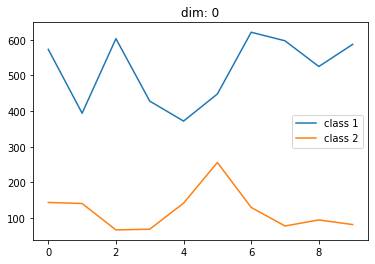

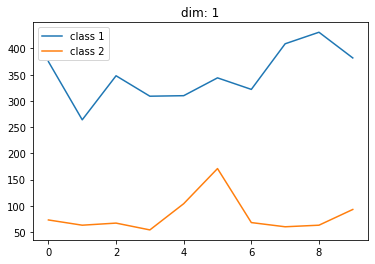

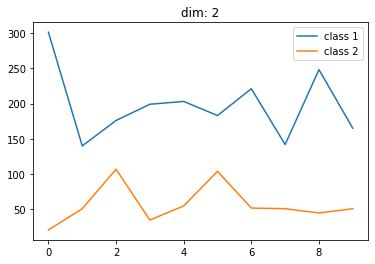

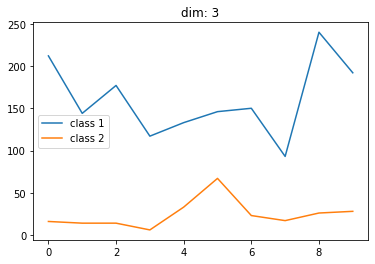

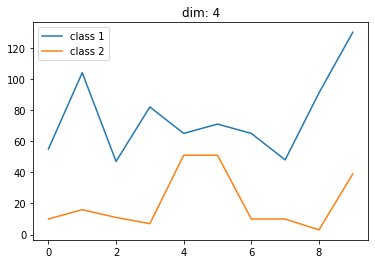

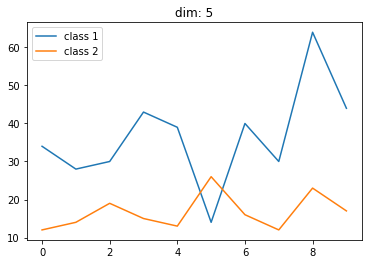

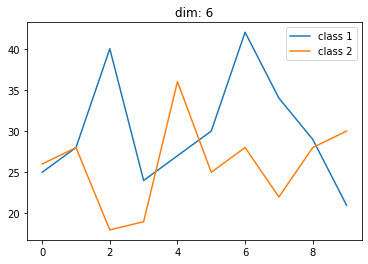

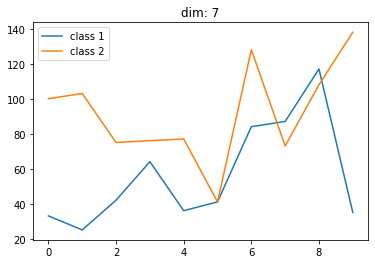

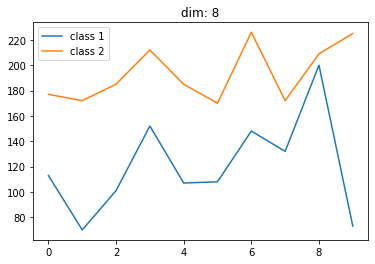

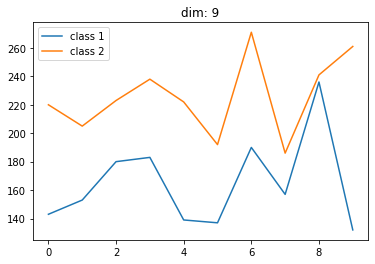

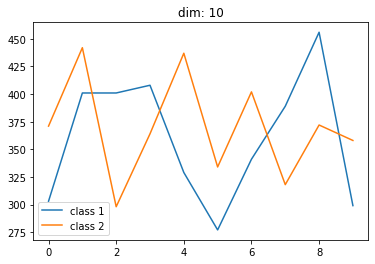

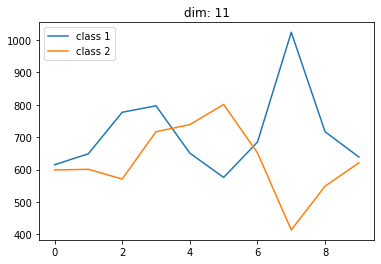

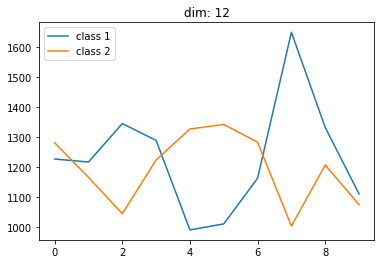

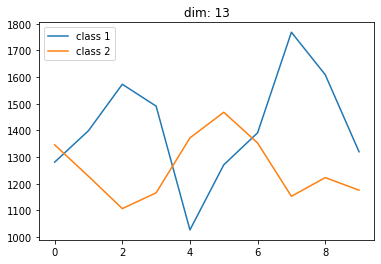

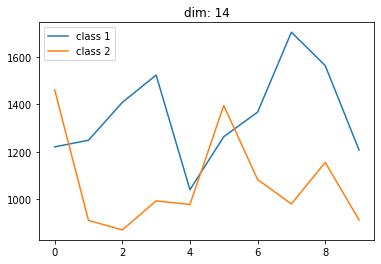

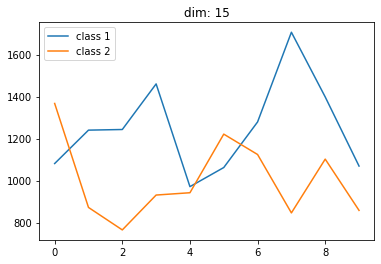

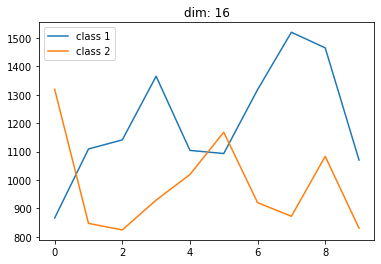

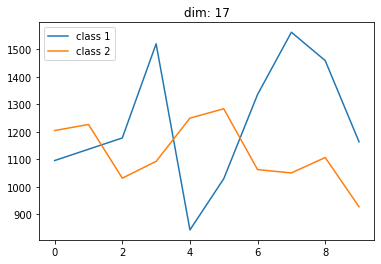

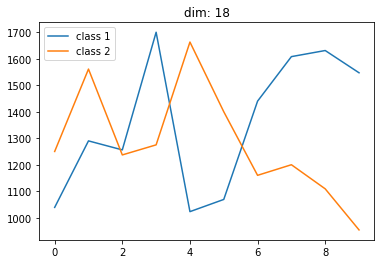

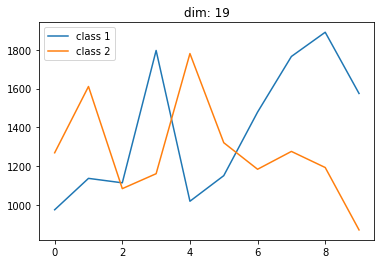

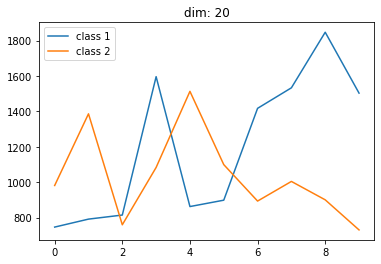

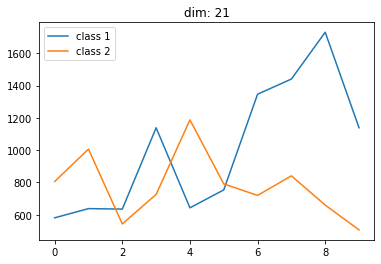

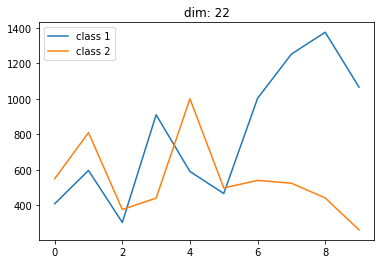

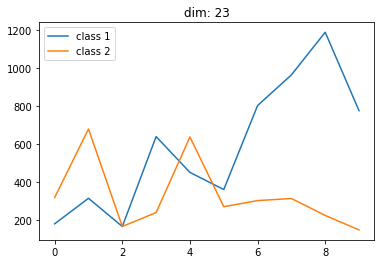

In [114]:
for dim in range(X_train.shape[1]):
    for y_val in np.unique(y_test):
        plt.plot(X_train[y_train==y_val][:,dim], label='class %d'%int(y_val))
    plt.title('dim: %d'%dim)
    plt.legend()
    plt.show()